In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision.datasets as dsets
import torchvision.transforms as transforms
from torch.utils.data import DataLoader, Dataset

import random
import matplotlib.pyplot as plt
from IPython.display import clear_output

In [2]:
# Cuda setting if there is GPU
# else ==> CPU setting

device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [3]:
print(device, "is available!")

cpu is available!


In [4]:
# for reproducibility
random.seed(777)
torch.manual_seed(777)
if device == 'cuda':
    torch.cuda.manual_seed_all(777)

In [5]:
training_epochs = 15
batch_size = 100

In [6]:
mnist_train = dsets.MNIST(root="./MNIST_data/", 
                          train=True, 
                          transform=transforms.ToTensor(), 
                          download=True
                         )

mnist_test = dsets.MNIST(root="./MNIST_data/", 
                          train=False, 
                          transform=transforms.ToTensor(), 
                          download=True
                         )

In [7]:
data_loader = DataLoader(mnist_train, 
                         batch_size=batch_size,
                         shuffle=True,
                         drop_last=True)

In [8]:
linear = torch.nn.Linear(784, 10, bias=True).to(device)
criterion = torch.nn.CrossEntropyLoss().to(device)
optimizer = optim.SGD(linear.parameters(), lr=.1)

In [9]:
for epoch in range(training_epochs):
    avg_cost = 0
    total_batch = len(data_loader)
    
    for x, y in data_loader:
        x = x.view(-1, 28 * 28).to(device)
        hypotheis = linear(x)
        cost = criterion(hypotheis, y)
        
        optimizer.zero_grad()
        cost.backward()
        optimizer.step()
        avg_cost += cost / total_batch
    
    clear_output(wait=True)
    print("Epoch: ", "%04d" % (epoch+1), "cost =", "{:.9f}".format(avg_cost))
    
print("Learning Finished")

Epoch:  0015 cost = 0.274440855
Learning Finished


Accuracy: 0.8863000273704529
Label:  8
Prediction:  3


/Users/honeyeob/python_workspace/Pytorch/lib/python3.7/site-packages/torchvision/datasets/mnist.py:60: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")
/Users/honeyeob/python_workspace/Pytorch/lib/python3.7/site-packages/torchvision/datasets/mnist.py:50: UserWarning: test_labels has been renamed targets
  warnings.warn("test_labels has been renamed targets")


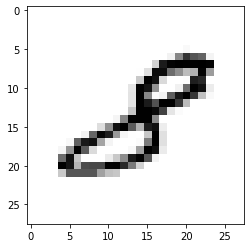

In [10]:
with torch.no_grad():
    X_test = mnist_test.test_data.view(-1, 28 * 28).float().to(device)
    Y_test = mnist_test.test_labels.to(device)

    prediction = linear(X_test)
    correct_prediction = torch.argmax(prediction, 1) == Y_test
    accuracy = correct_prediction.float().mean()
    print('Accuracy:', accuracy.item())

    # Get one and predict
    r = random.randint(0, len(mnist_test) - 1)
    X_single_data = mnist_test.test_data[r:r + 1].view(-1, 28 * 28).float().to(device)
    Y_single_data = mnist_test.test_labels[r:r + 1].to(device)

    print('Label: ', Y_single_data.item())
    single_prediction = linear(X_single_data)
    print('Prediction: ', torch.argmax(single_prediction, 1).item())

    plt.imshow(mnist_test.test_data[r:r + 1].view(28, 28), cmap='Greys', interpolation='nearest')
    plt.show()